In [10]:
# High-dimensional Linear Regression
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

# To make the effects of overfitting pronounced, we can increase the dimensionality
# of our problem to 'd=200' and work with a small training set containing only 20 examples.
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = tf.ones(shape=(num_inputs, 1)) * 0.01, 0.05 # true weights and bias
train_data = d2l.synthetic_data(true_w, true_b, n_train) # tuple of (20, 200), (20, 1)
train_iter = d2l.load_array(train_data, batch_size) # Iterator of batch size 5
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False) # Iterator of batch size 5

# Initialization of model parameters and defining the regularization term is unnecessary,
# thx to 'keras' API.
# loss ftn is given in mean and for both loss ftn and regularizer, rescaling with 1/2 is not made,
# as manually made user-defined ftns of loss ftn and regularizer.
# Concise Implementation
def train_concise(wd):
    net = tf.keras.models.Sequential()
    net.add(tf.keras.layers.Dense(
        1, kernel_regularizer=tf.keras.regularizers.l2(wd)
    ))
    # 왜 'input_shape' 옵션을 다음과 같이 설정했는지 직접 코드를 실행해보면 알 수 있다.
    # 'net_build()' ftn을 사용했기 때문에 아래의 'w', 'b'를 정의할 수 있다.
    net.build(input_shape=(1, num_inputs))
    w, b = net.trainable_variables
    loss = tf.keras.losses.MeanSquaredError() # 직접 해보면 '1/2'가 곱해지지 않음을 확인할 수 있습니다.
    num_epochs, lr = 100, 0.003
    trainer = tf.keras.optimizers.SGD(learning_rate=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
    xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                # 'tf.keras' requires retrieving and adding the losses from
                # layers manually for custom training loop.
                l = loss(net(X), y) + net.losses # the latter refers to the regularization term. 
            grads = tape.gradient(l, net.trainable_variables)
            trainer.apply_gradients(zip(grads, net.trainable_variables))
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (
                d2l.evaluate_loss(net, train_iter, loss), # regularized term이 아닌 loss만을 가지고 진행!
                d2l.evaluate_loss(net, test_iter, loss)
            ))
    print('L2 norm of w:', tf.norm(net.get_weights()[0]).numpy())

L2 norm of w: 0.025911713


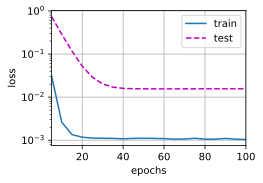

In [11]:
# Training w/o regularization
#train_concise(0)

# Training w/ regularization
train_concise(4)